<a id = "1.0"></a>
<p style="font-size:25px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px;">
<strong>AutoML Regresores II</strong></p> 

<a id = "1.0"></a>
<p style="font-size:12px;color:#16268a;font-family:'Avantgarde';text-align:right;border-radius:5px;">
<strong>
<a href="https://epistasislab.github.io" target=\"_blank\">Ejemplo adaptado para el curso de TPOT</a>
</strong></p>

Dataset: **Boston**<br>
Dataset Description:<br> 
CRIM -    per capita crime rate by town<br>
ZN -      proportion of residential land zoned for lots over 25,000 sq.ft.<br>
INDUS -   proportion of non-retail business acres per town.<br>
CHAS -    Charles River dummy variable (1 if tract bounds river; 0 otherwise)<br>
NOX -     nitric oxides concentration (parts per 10 million)<br>
RM -      average number of rooms per dwelling<br>
AGE -     proportion of owner-occupied units built prior to 1940<br>
DIS -     weighted distances to five Boston employment centres<br>
RAD -     index of accessibility to radial highways<br>
TAX -     full-value property-tax rate per 10,000<br>
PTRATIO - pupil-teacher ratio by town<br>
 B -       1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town<br>
LSTAT -   % lower status of the population<br>
MEDV -    Median value of owner-occupied homes in $1000's<br>

---------------------

<a id = "1.0"></a>
<p style="font-size:17px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>Librería TPOT para regresión</strong></p> 

In [58]:
from tpot import TPOTRegressor

In [59]:
import pandas as pd
import numpy as np

In [65]:
import seaborn as sns

In [66]:
import matplotlib.pyplot as plt 

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
from sklearn.model_selection import RepeatedKFold

In [74]:
import warnings
warnings.filterwarnings("ignore")

<a id = "1.0"></a>
<p style="font-size:17px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>Carga de datos desde URL</strong></p> 

In [62]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

<a id = "1.0"></a>
<p style="font-size:17px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>Datos para entrenamiento y prueba</strong></p> 

In [63]:
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(data, target, train_size=0.75, test_size=0.25)

<a id = "1.0"></a>
<p style="font-size:17px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>Análisis Exploratorio</strong></p> 

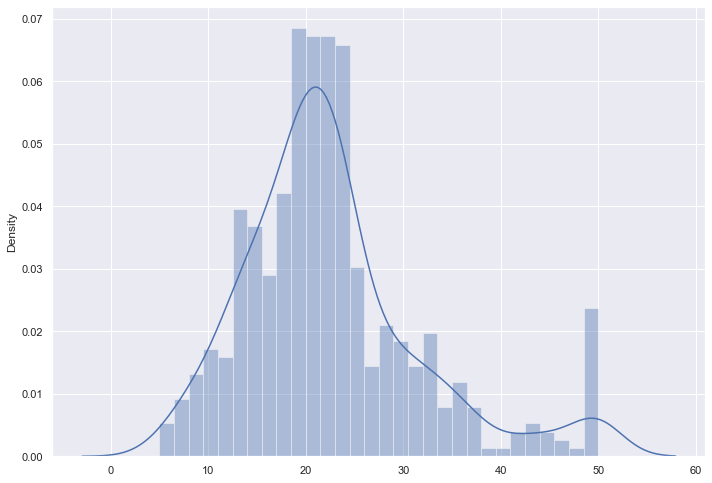

In [75]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(target, bins=30)
plt.show()

In [68]:
correlation_matrix = raw_df.corr().round(2)

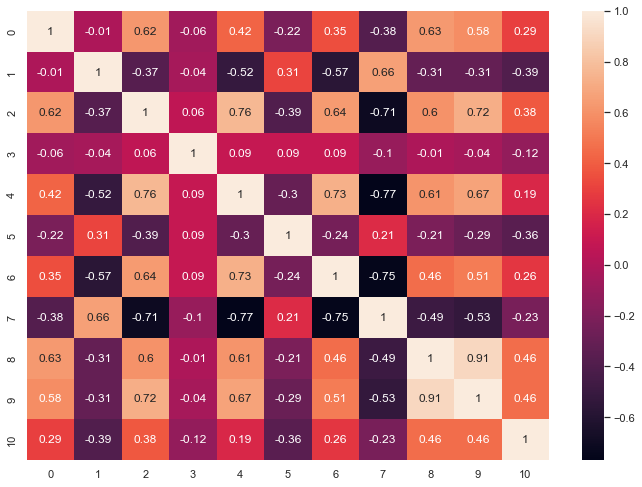

In [77]:
sns.heatmap(data=correlation_matrix, annot=True);

<a id = "1.0"></a>
<p style="font-size:17px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>Configuración del cross validation</strong></p> 

In [70]:
cvKFold = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

<a id = "1.0"></a>
<p style="font-size:17px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>Confirguración Regresor</strong></p> 

In [71]:
tpot = TPOTRegressor(generations=10, 
                     population_size=50,
                     cv=cvKFold,
                     scoring='neg_mean_absolute_error',
                     verbosity=2,
                     random_state=1)

Métricas________________________________________________________________________________________________________________<BR>
* #### [Regression: An Explanation of Regression Metrics And What Can Go Wrong](https://towardsdatascience.com/regression-an-explanation-of-regression-metrics-and-what-can-go-wrong-a39a9793d914)
* #### [3 Best metrics to evaluate Regression Model?](https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b)
* #### [Know The Best Evaluation Metrics for Your Regression Model !](https://www.analyticsvidhya.com/blog/2021/05/know-the-best-evaluation-metrics-for-your-regression-model/)
* #### [Error Cuadrático Medio para Regresión](https://www.iartificial.net/error-cuadratico-medio-para-regresion/)

<a id = "1.0"></a>
<p style="font-size:17px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>Entrenamiento Regresor</strong></p> 

In [72]:
tpot.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/550 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -2.3986396185189913

Generation 2 - Current best internal CV score: -2.3714349780097046

Generation 3 - Current best internal CV score: -2.270102311522049

Generation 4 - Current best internal CV score: -2.2655737466057477

Generation 5 - Current best internal CV score: -2.2655737466057477

Generation 6 - Current best internal CV score: -2.238388089170979

Generation 7 - Current best internal CV score: -2.238388089170979

Generation 8 - Current best internal CV score: -2.18636700995125

Generation 9 - Current best internal CV score: -2.18636700995125

Generation 10 - Current best internal CV score: -2.18636700995125

Best pipeline: LassoLarsCV(ExtraTreesRegressor(ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=0.6500000000000001, min_samples_leaf=4, min_samples_split=6, n_estimators=100), bootstrap=False, max_features=0.6500000000000001, min_samples_leaf=4, min_samples_split=2, n_estimators=100), normalize=False)


TPOTRegressor(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
              generations=10, population_size=50, random_state=1,
              scoring='neg_mean_absolute_error', verbosity=2)

<a id = "1.0"></a>
<p style="font-size:17px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>Neg Mean Absolute Error</strong></p> 

In [76]:
print(tpot.score(X_test, y_test))

-2.062355047391391


<a id = "1.0"></a>
<p style="font-size:17px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>Exportar el modelo</strong></p> 

In [9]:
tpot.export('./exp/tpot_boston_pipeline.py')

<a id = "1.0"></a>
<p style="font-size:25px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px;">
<strong>______________________</strong></p> 